# Module 3 : Performance measurements of Decision Tree

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the given dataset
df = p.read_csv("df4.csv")

In [4]:
df.rename(columns={'Mean Temp':'T'}, inplace=True)
df.rename(columns={'Average Humidity':'H'}, inplace=True)
df.rename(columns={'rainfall':'R'}, inplace=True)
df.rename(columns={'Cost of Cultivation (`/Hectare) C2':'CC'}, inplace=True)
df.rename(columns={'Cost of Production (`/Quintal) C2':'CP'}, inplace=True)
df.rename(columns={'Yield (Quintal/ Hectare) ':'Y'}, inplace=True)
df.rename(columns={'cost of production per yield':'CPPY'}, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Y']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)
df['YPr']= df.Y.map({'13':0, '7':0, '11':0, '4':0, '23':0, '39':1, '10':0, '18':0, '36':1, '47':1, '8':0, '3':0,
       '38':1, '46':1, '5':0, '9':0, '2':0, '44':1, '17':0, '41':1, '6':0, '16':0, '35':1, '19':0,
       '0':0, '43':1, '12':0, '45':1, '25':0, '33':1, '29':0, '37':1, '32':1, '21':0, '42':1,
       '48':1, '30':1, '34':1, '26':0, '20':0, '31':1, '24':0, '27':0, '22':0, '40':1, '28':0,
       '1':0, '14':0, '15':0})



In [6]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y', 'CPPY', 'YPr'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y','CPPY']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,R,H,T,CC,CP,Y,CPPY,YPr
0,0,42,3,0,0,1015,33,45,10,21,30,5,126,0
1,0,42,4,0,0,1015,121,44,6,3,26,46,72,0
2,0,42,5,3,0,1016,118,46,1,33,45,3,200,0
3,0,42,6,3,0,1018,172,45,6,4,36,34,78,0
4,0,42,7,3,0,1019,75,51,15,20,24,16,144,0


In [8]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

# Prediction of Crop by yield

In [9]:
X = df.drop(labels='YPr', axis=1)
#Response variable
y = df.loc[:,'YPr']    

In [10]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Decision Tree Classifier


Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1776
           1       1.00      1.00      1.00      1087

    accuracy                           1.00      2863
   macro avg       1.00      1.00      1.00      2863
weighted avg       1.00      1.00      1.00      2863

Accuracy result of Decision Tree Classifier is 100.0

Confusion Matrix result of Decision Tree Classifier is:
 [[1776    0]
 [   0 1087]]

Sensitivity :  1.0

Specificity :  1.0
Cross validation test results of accuracy:
[1. 1. 1. 1. 1.]

Accuracy result of DecisionTreeClassdifier is: 100.0


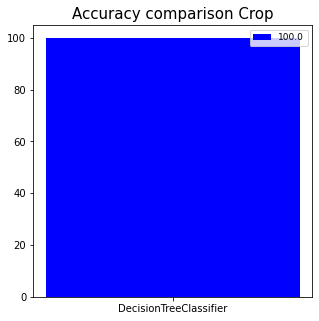

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
x = (accuracy_score(y_test,predictDT)*100)

print('Accuracy result of Decision Tree Classifier is', x)
print("")
cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n', confusion_matrix(y_test,predictDT))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)

accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of DecisionTreeClassdifier is:",accuracy.mean() * 100)
dtree=accuracy.mean() * 100




def graph():
    import matplotlib.pyplot as plt
    data=[dtree]
    alg="DecisionTreeClassifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison Crop",fontsize=15)
    plt.legend(b,data,fontsize=9)




graph()

True Positive : 1087
True Negative : 1776
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0
[[1776    0]
 [   0 1087]]


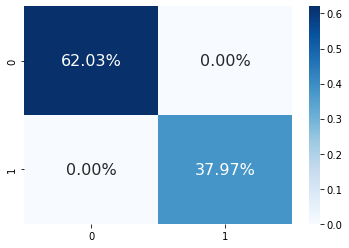

In [12]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

cm2=confusion_matrix(y_test, predictDT)
print(cm2)
s.heatmap(cm2/n.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()

# Prediction of Crop by Cost production

In [13]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['CPPY']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)
df['CPPYPr']= df.CPPY.map({'126':0, '72':0, '200':0, '78':0, '144':0, '212':0, '149':0, '151':0, '178':0, '312':0,
       '187':0, '69':0, '205':0, '276':1, '76':0, '134':0, '66':0, '254':1, '150':0, '291':1,
       '155':0, '106':0, '87':0, '119':0, '183':0, '170':0, '28':0, '265':1, '180':0, '36':0,
       '293':1, '326':1, '148':0, '234':1, '3':0, '124':0, '111':0, '182':0, '166':0, '169':0,
       '270':1, '243':1, '98':0, '230':0, '282':1, '334':1, '188':0, '65':0, '34':0, '328':1,
       '160':0, '115':0, '89':0, '152':0, '240':1, '141':0, '233':1, '32':0, '281':1, '335':1,
       '109':0, '47':0, '136':0, '112':0, '261':1, '229':0, '42':0, '325':1, '213':0, '175':0,
       '125':0, '196':0, '292':1, '82':0, '235':1, '79':0, '105':0, '123':0, '210':0, '39':0,
       '146':0, '185':0, '201':0, '41':0, '164':0, '184':0, '222':0, '250':0, '301':1,
       '218':0, '217':0, '168':0, '264':1, '46':0, '103':0, '284':1, '198':0, '56':0, '171':0,
       '331':1, '256':1, '99':0, '58':0, '247':1, '286':1, '67':0, '133':0, '143':0, '204':0,
       '227':0, '194':0, '6':0, '280':1, '225':0, '48':0, '258':1, '94':0, '244':1, '294':1,
       '215':0, '132':0, '277':1, '71':0, '219':0, '315':1, '97':0, '91':0, '156':0, '289':1,
       '100':0, '295':1, '147':0, '214':0, '19':0, '223':0, '90':0, '269':1, '300':1, '114':0,
       '135':0, '173':0, '55':0, '113':0, '127':0, '73':0, '177':0, '274':1, '118':0, '191':0,
       '145':0, '307':1, '162':0, '228':0, '50':0, '5':0, '248':1, '203':0, '61':0, '129':0,
       '192':0, '83':0, '158':0, '206':0, '242':1, '267':1, '137':0, '92':0, '176':0, '298':1,
       '25':0, '296':1, '186':0, '239':1, '193':0, '165':0, '310':1, '20':0, '287':1, '75':0,
       '107':0, '271':1, '138':0, '121':0, '241':1, '74':0, '43':0, '232':0, '154':0, '181':0,
       '195':0, '102':0, '237':1, '110':0, '268':1, '49':0, '104':0, '64':0, '318':1, '13':0,
       '128':0, '153':0, '31':0, '93':0, '309':1, '257':0, '52':0, '262':1, '202':0, '174':0,
       '101':0, '224':0, '86':0, '45':0, '263':1, '167':0, '17':0, '29':0, '30':0, '54':0,
       '303':1, '163':0, '251':1, '142':0, '273':1, '96':0, '35':0, '327':1, '53':0, '15':0,
       '190':0, '308':1, '226':0, '139':0, '62':0, '2':0, '1':0, '27':0, '84':0, '285':1,
       '246':1, '23':0, '189':0, '299':1, '231':0, '24':0, '16':0, '333':1, '306':1, '18':0,
       '288':1, '199':0, '260':1, '323':1, '37':0, '278':1, '324':1, '140':0, '4':0, '245':1,
       '322':1, '329':1, '159':0, '80':0, '197':0, '275':1, '11':0, '40':0, '33':0, '0':0,
       '320':1, '290':1, '68':0, '220':0, '21':0, '330':1, '12':0, '157':0, '302':1, '44':0,
       '221':0, '216':0, '279':1, '63':0, '313':1, '311':1, '332':1, '266':1, '238':1,
       '211':0, '172':0, '14':0, '117':0, '161':0, '122':0, '60':0, '321':1, '95':0, '208':0,
       '272':1, '131':0, '207':0, '81':0, '314':1, '51':0, '283':1, '120':0, '38':0, '9':0,
       '130':0, '70':0, '179':0, '7':0, '10':0, '108':0, '255':1, '77':0, '88':0, '22':0,
       '57':0, '85':0, '304':1, '253':1, '249':0, '297':1, '116':0, '305':1, '317':1, '252':1,
       '236':1, '209':0, '259':1, '26':0, '319':1, '316':1, '59':0, '336':1, '8':0})



In [14]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y','CPPY']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,R,H,T,CC,CP,Y,CPPY,YPr,CPPYPr
0,0,37,11,0,0,20,141,40,2,14,24,44,235,0,0
1,0,37,12,0,0,20,26,39,44,23,19,41,232,0,1
2,0,37,13,3,0,21,22,41,1,27,40,23,18,0,0
3,0,37,14,3,0,23,82,40,44,34,30,28,239,0,1
4,0,37,15,3,0,24,187,47,7,13,17,8,284,0,0


In [15]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [16]:
X = df.drop(labels='CPPYPr', axis=1)
#Response variable
y = df.loc[:,'CPPYPr']    

In [17]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Decision Tree Classifier


Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       1.00      1.00      1.00       877

    accuracy                           1.00      2863
   macro avg       1.00      1.00      1.00      2863
weighted avg       1.00      1.00      1.00      2863

Accuracy result of Decision Tree Classifier is 100.0

Confusion Matrix result of Decision Tree Classifier is:
 [[1986    0]
 [   0  877]]

Sensitivity :  1.0

Specificity :  1.0
Cross validation test results of accuracy:
[1. 1. 1. 1. 1.]

Accuracy result of DecisionTreeClassdifier is: 100.0


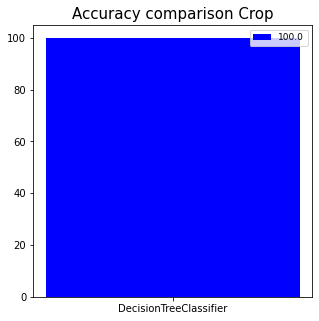

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
x = (accuracy_score(y_test,predictDT)*100)

print('Accuracy result of Decision Tree Classifier is', x)
print("")
cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n', confusion_matrix(y_test,predictDT))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)

accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of DecisionTreeClassdifier is:",accuracy.mean() * 100)
dtree=accuracy.mean() * 100




def graph():
    import matplotlib.pyplot as plt
    data=[dtree]
    alg="DecisionTreeClassifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison Crop",fontsize=15)
    plt.legend(b,data,fontsize=9)




graph()

True Positive : 877
True Negative : 1986
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0
[[1986    0]
 [   0  877]]


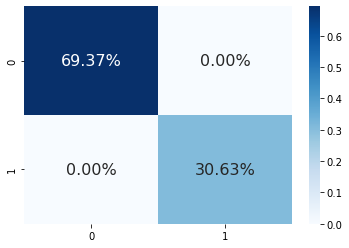

In [19]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)
cm2=confusion_matrix(y_test, predictDT)
print(cm2)
s.heatmap(cm2/n.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()